In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from urllib.request import urlopen
import json

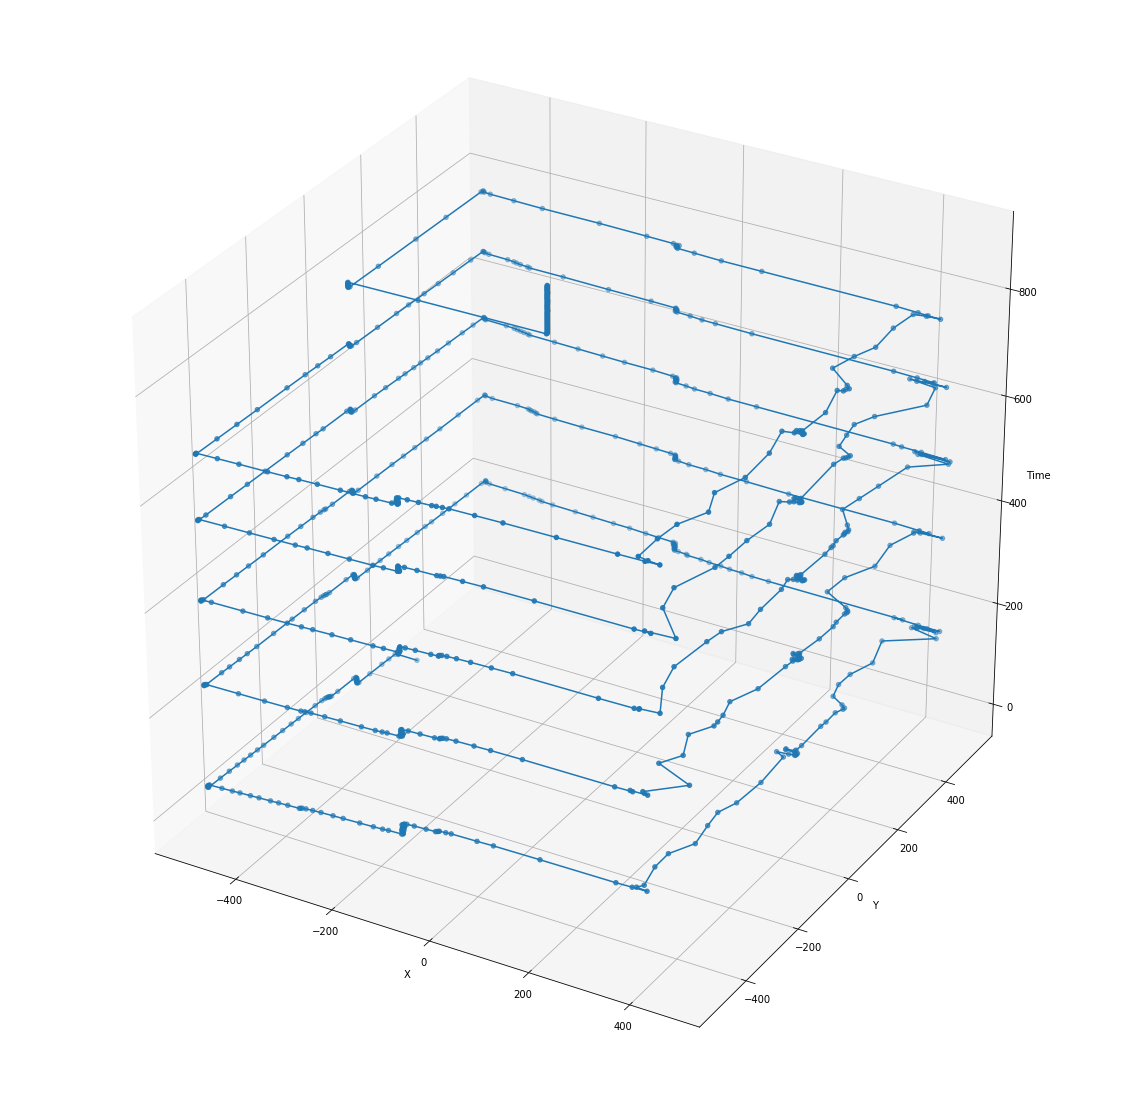

In [106]:
with urlopen('http://192.168.1.109:3000/devices/joystick') as response:
    for line in response:
        line = line.decode('utf-8')  # Decoding the binary data to text.
        
data = json.loads(line)
l = np.empty((len(data),3))
for idx,d in enumerate(data):
    l[idx,0] = d['data']['X']
    l[idx,1] = d['data']['Y']
    l[idx,2] = d['data']['Switch']
        
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(l[:,0],l[:,1],range(len(l)))
ax.plot(l[:,0],l[:,1],range(len(l)))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')

plt.show()

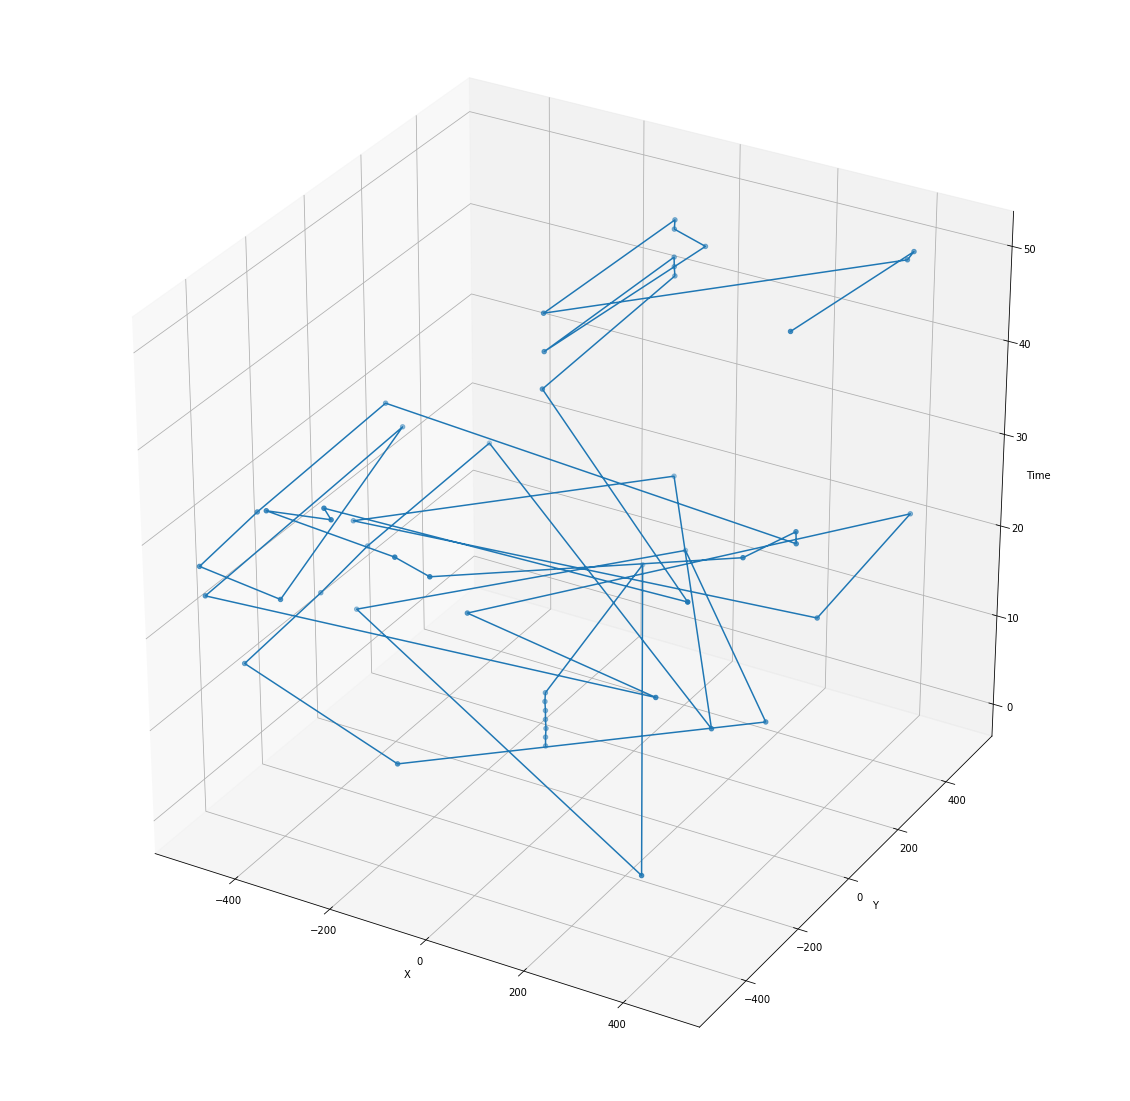